In [31]:
import openpyxl
import numpy as np
from os import mkdir
import pyswarms as ps
from functions import *
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from pyswarms.utils.plotters import plot_cost_history

In [32]:
workbook = openpyxl.load_workbook('DataRegression.xlsx')
values = {'Var01': [[], []], 'Var12': [[], []], 'Var16': [[], []]}

for sheet_name in values.keys():
    sheet = workbook[sheet_name]

    for row in sheet.iter_rows(values_only=True):
        y, x = row
        if x != 'x' or y != 'y':
            values[f'{sheet_name}'][0].append(x)
            values[f'{sheet_name}'][1].append(y)

for key, value in values.items():
    print(key, value)

Var01 [[77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760], [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]]
Var12 [[-4868.68, -4868.09, -4867.41, -3375.19, -3373.14, -3372.03, -2473.74, -2472.35, -2469.45, -1894.65, -1893.4, -1497.24, -1495.85, -1493.41, -1208.68, -1206.18, -1206.04, -997.92, -996.61, -996.31, -834.94, -834.66, -710.03, -530.16, -464.17], [0.252429, 0.252141, 0.251809, 0.297989, 0.296257, 0.295319, 0.339603, 0.337731, 0.33382, 0.38951, 0.386998, 0.438864, 0.434887, 0.427893, 0.471568, 0.461699, 0.461144, 0.513532, 0.506641, 0.505062, 0.535648, 0.533726, 0.568064, 0.612886, 0.624169]]
Var16 [[400, 405, 410, 415, 420, 425, 430, 435, 436.5, 438, 439.5, 441, 442.5, 444, 445.5, 447, 448.5, 450, 451.5, 453, 454.5, 456, 457.5, 459, 460.5, 462, 463.5, 465, 470, 475, 480, 485, 490, 495, 500], [0.0001575, 0.0001699, 0.000235, 0.0003102, 0.0004917, 0.000871, 0.0017418, 0.00464, 0.0065895,

# PSO

In [33]:
def plot(function, pos, optimizer, x_data, y_data):
    print(f'\nOptimal parameters: {pos}')

    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = function(x_fit, *pos)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted model', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data and Fitted Model')
    plt.show()

    plot_cost_history(optimizer.cost_history)
    plt.show()

2024-06-03 17:53:02,252 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.45, 'c2': 0.45, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/2000, best_cost=40.2

pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=17.4
2024-06-03 17:53:05,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 17.371011824341622, best pos: [9.92601482e+01 1.77074722e-03]



Optimal parameters: [9.92601482e+01 1.77074722e-03]


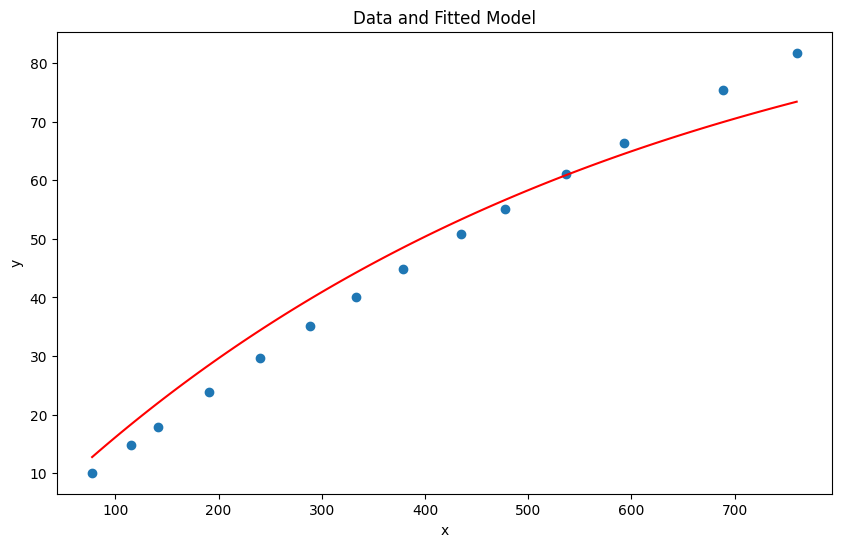

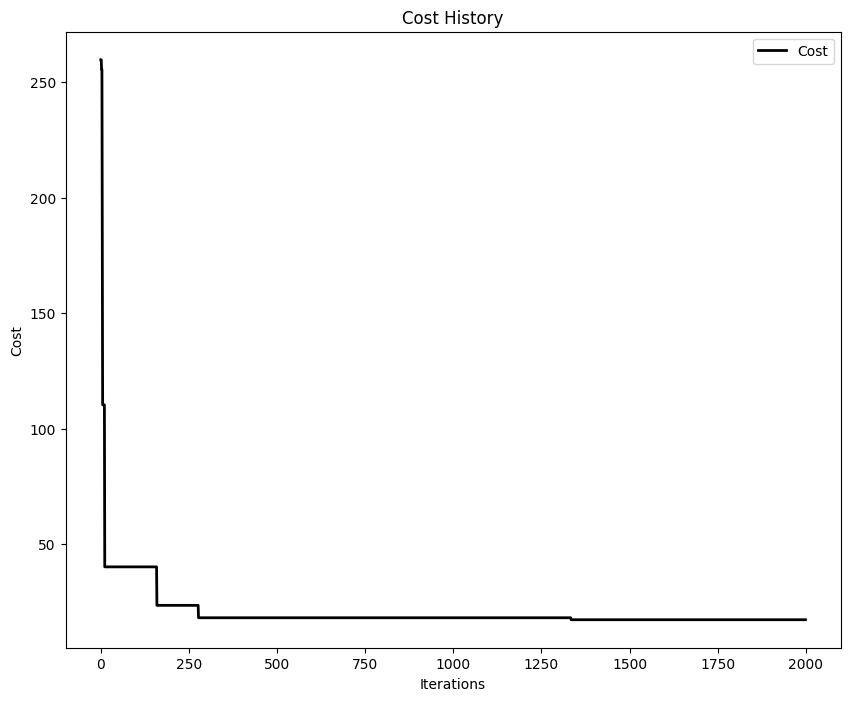

In [34]:
x_data = np.array(values['Var01'][0])
y_data = np.array(values['Var01'][1])

def objective_function(params):
    b1 = params[:, 0]
    b2 = params[:, 1]
    y_pred = Var01(x_data[:, None], b1, b2)
    return np.mean((y_data[:, None] - y_pred) ** 2, axis=0)

bounds = [np.array([0, 0]), np.array([100, 1])]
options = {'c1': 0.45, 'c2': 0.45, 'w': 0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=400, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_function, iters=2000)

plot(Var01, pos, optimizer, x_data, y_data)

2024-06-03 17:53:05,972 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.45, 'c2': 0.45, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=1.98e-5
2024-06-03 17:53:09,085 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.9793938932388014e-05, best pos: [ 2.01968680e-01 -6.19535433e-06  1.20445561e+03 -1.81342654e+02]



Optimal parameters: [ 2.01968680e-01 -6.19535433e-06  1.20445561e+03 -1.81342654e+02]


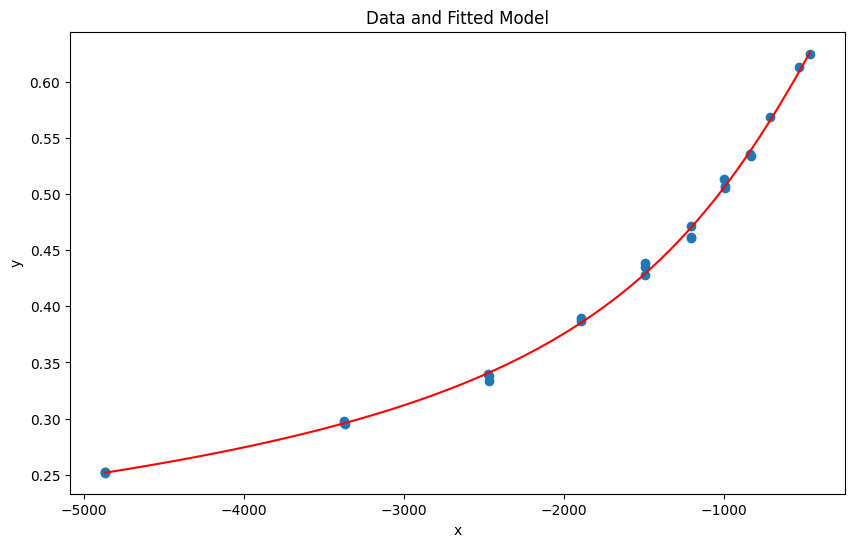

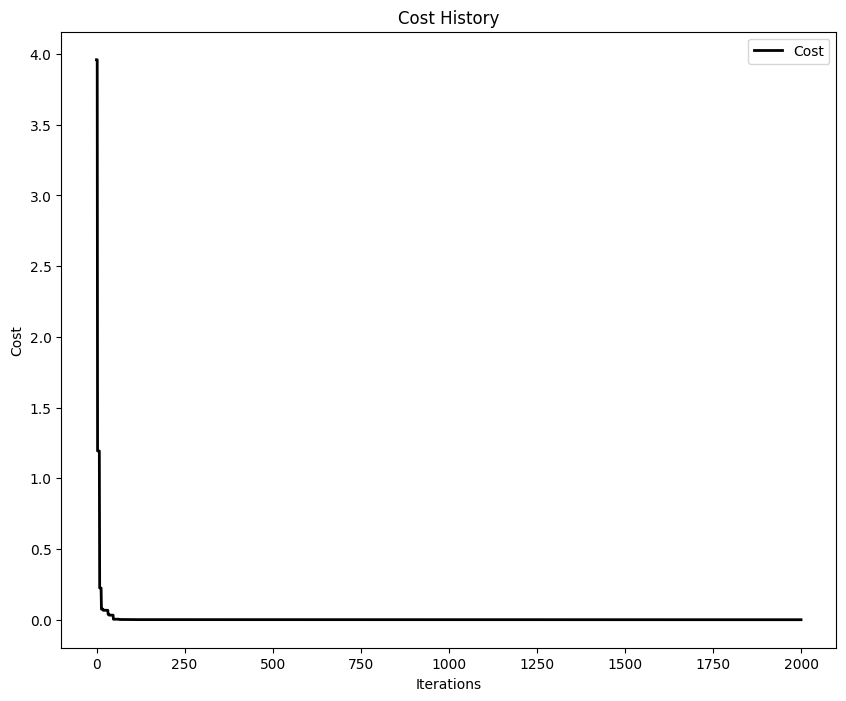

In [35]:
x_data = np.array(values['Var12'][0])
y_data = np.array(values['Var12'][1])

def objective_function(params):
    b1 = params[:, 0]
    b2 = params[:, 1]
    b3 = params[:, 2]
    b4 = params[:, 3]
    y_pred = Var12(x_data[:, None], b1, b2, b3, b4)
    return np.mean((y_data[:, None] - y_pred) ** 2, axis=0)

bounds = (np.array([-1, -1, 1000, -200]), np.array([1, 1, 2000, 200]))
options = {'c1': 0.45, 'c2': 0.45, 'w': 0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=400, dimensions=4, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_function, iters=2000)

plot(Var12, pos, optimizer, x_data, y_data)

2024-06-03 17:53:09,461 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.45, 'c2': 0.45, 'w': 0.9}


pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=4.18e-5
2024-06-03 17:53:12,380 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.181682139221335e-05, best pos: [  1.55438272   4.08883218 451.54121844]



Optimal parameters: [  1.55438272   4.08883218 451.54121844]


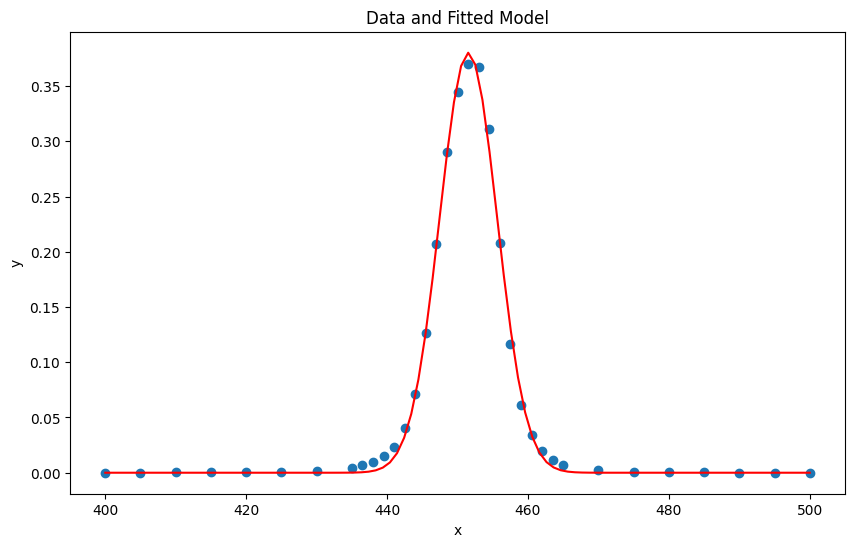

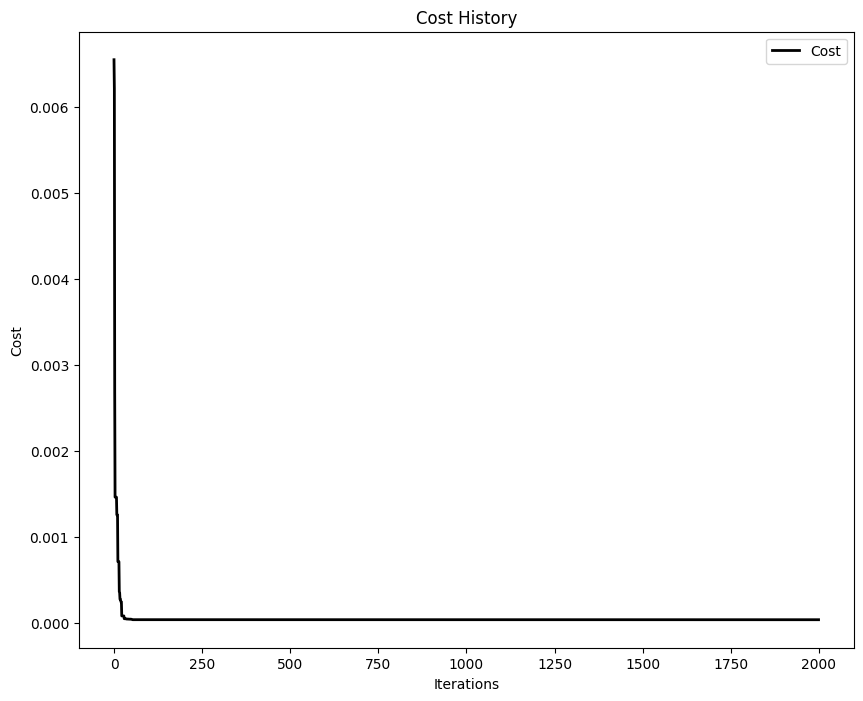

In [36]:
x_data = np.array(values['Var16'][0])
y_data = np.array(values['Var16'][1])

def objective_function(params):
    b1 = params[:, 0]
    b2 = params[:, 1]
    b3 = params[:, 2]
    y_pred = Var16(x_data[:, None], b1, b2, b3)
    return np.mean((y_data[:, None] - y_pred) ** 2, axis=0)

bounds = [np.array([1, 1, 100]), np.array([10, 10, 1000])]
options = {'c1': 0.45, 'c2': 0.45, 'w': 0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=400, dimensions=3, options=options, bounds=bounds)
cost, pos = optimizer.optimize(objective_function, iters=2000)

plot(Var16, pos, optimizer, x_data, y_data)

# DE

In [54]:
cost_history = []

def callback(params, convergence):
    cost = objective_function(params)
    cost_history.append(*cost)

def plot(function, objective_function, pos, x_data, y_data):
    print(f'Optimal parameters: {pos}')
    print(f'Final fitness value: {objective_function(pos)}')

    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = function(x_fit, *pos)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted model', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data and Fitted Model')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(cost_history, label='Cost History', color='black')
    plt.xlabel('Iteration') 
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.show()

Optimal parameters: [9.99996934e+01 1.70090550e-03]
Final fitness value: [16.06061081]


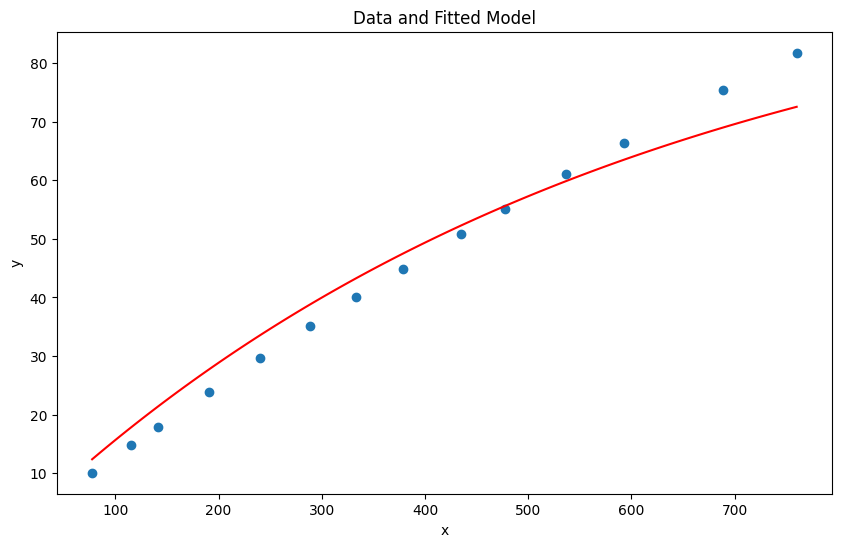

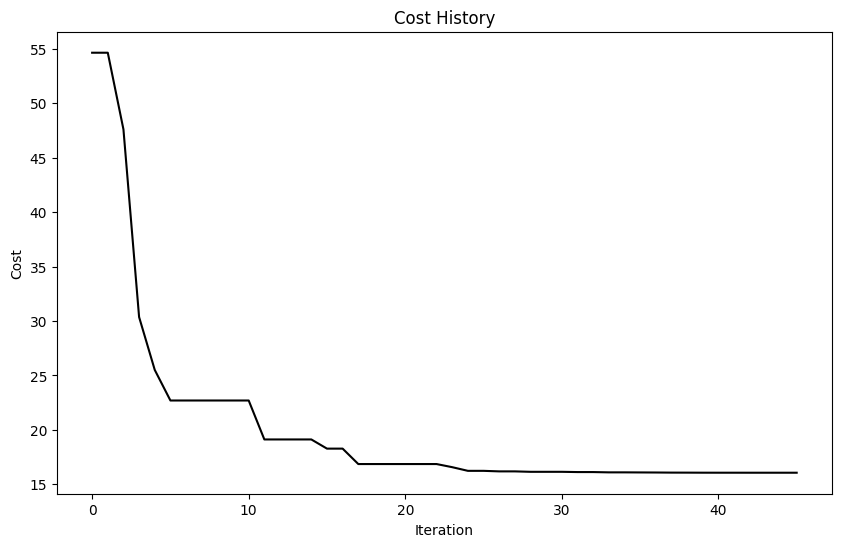

In [47]:
x_data = np.array(values['Var01'][0])
y_data = np.array(values['Var01'][1])

def objective_function(params):
    b1, b2 = params
    y_pred = Var01(x_data[:, None], b1, b2)
    return np.mean((y_data[:, None] - y_pred) ** 2, axis=0)

bounds = [(0, 100), (0, 1)]

optimizer = differential_evolution(objective_function, bounds, maxiter=2000, popsize=400, callback=callback)

plot(Var01, objective_function, optimizer.x, x_data, y_data)

Optimal parameters: [ 2.01481394e-01 -6.11755663e-06  1.20582193e+03 -1.82894463e+02]
Final fitness value: [1.97953142e-05]


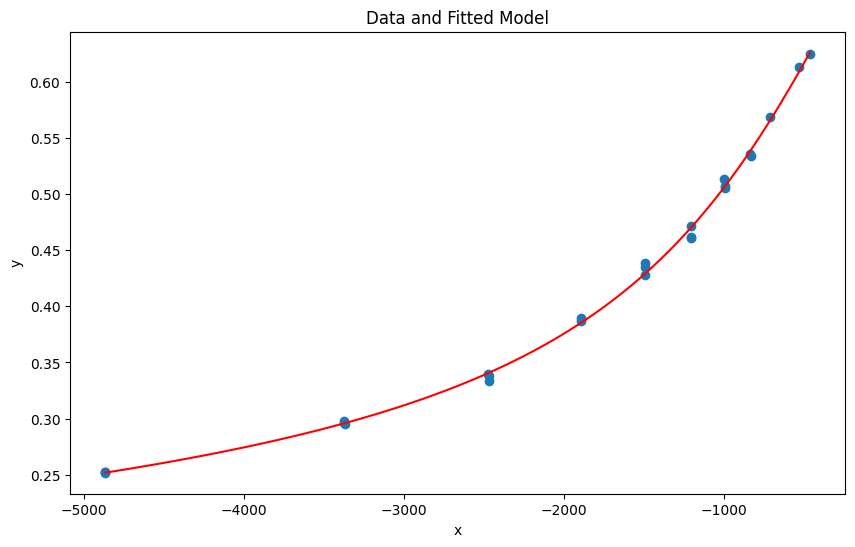

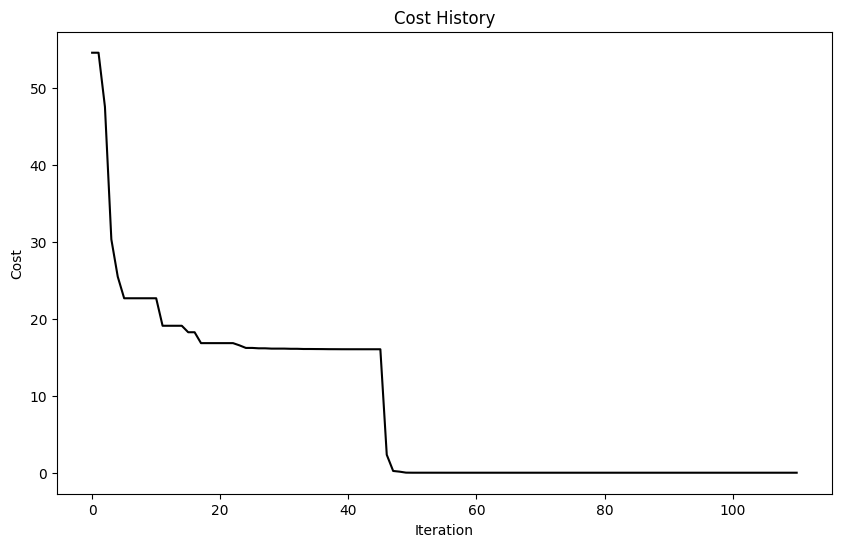

In [49]:
x_data = np.array(values['Var12'][0])
y_data = np.array(values['Var12'][1])

def objective_function(params):
    b1, b2, b3, b4 = params
    y_pred = Var12(x_data[:, None], b1, b2, b3, b4)
    return np.mean((y_data[:, None] - y_pred) ** 2, axis=0)

bounds = [(-1, 1), (-1, 1), (1000, 2000), (-200, 200)]

optimizer = differential_evolution(objective_function, bounds, maxiter=2000, popsize=400, callback=callback)

plot(Var12, objective_function, optimizer.x, x_data, y_data)

Optimal parameters: [  1.55408173   4.08796192 451.54083851]
Final fitness value: 4.181751590830843e-05


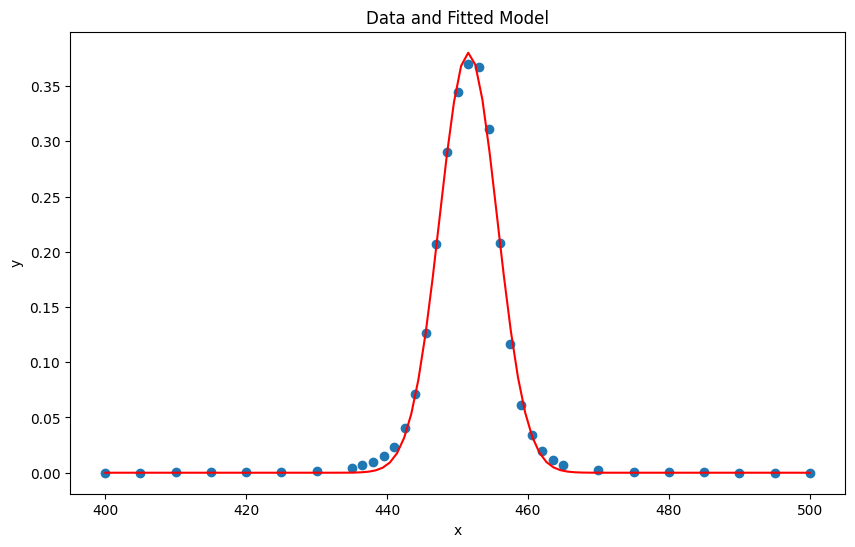

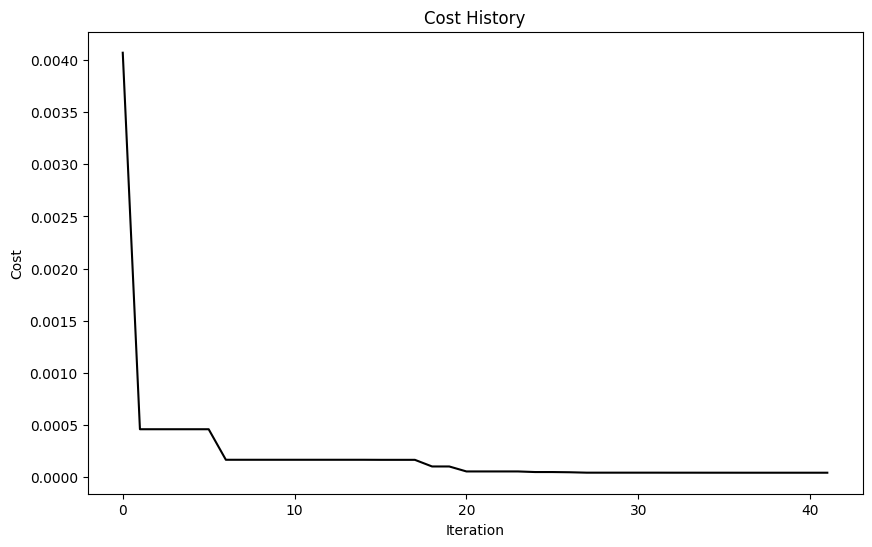

In [55]:
cost_history = []

def callback(params, convergence):
    cost = objective_function(params)
    cost_history.append(cost)

x_data = np.array(values['Var16'][0])
y_data = np.array(values['Var16'][1])

def objective_function(params):
    b1, b2, b3 = params
    y_pred = Var16(x_data, b1, b2, b3)
    return np.mean((y_data - y_pred) ** 2)

bounds = [(1, 10), (1, 10), (100, 1000)]

optimizer = differential_evolution(objective_function, bounds, maxiter=2000, popsize=400, callback=callback)

plot(Var16, objective_function, optimizer.x, x_data, y_data)